<a href="https://colab.research.google.com/github/rsumit123/IOT_lab/blob/master/COVID_19(MobileNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

---



In [0]:
# import keras
import tensorflow as tf
from zipfile import ZipFile
from matplotlib import pyplot as plt
import cv2
import os
import seaborn as sn
import numpy as np
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import keras
import keras.backend as K
from keras.models import Sequential
from keras import layers 
#from keras.applications import VGG16 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.mobilenet import MobileNet
from keras.optimizers import SGD,Adam,RMSprop
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

###Check for GPU

---



In [0]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

###Mount Google Drive

---



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Unzipping Dataset

---



In [0]:
!cd drive && cd 'My Drive' && cd COVID_19 && cd xray_augmented_mendley && ls

Dataset_All_Augmented.zip


In [0]:
!cd 'Dataset All Augmented' && ls

/bin/bash: line 0: cd: Dataset All Augmented: No such file or directory


In [0]:

file_name = "/content/drive/My Drive/COVID_19/xray_augmented_mendley/Dataset_All_Augmented.zip"
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
Dataset All Augmented/                         2020-03-26 09:56:58            0
Dataset All Augmented/COVID-19/                2020-03-26 12:01:12            0
Dataset All Augmented/COVID-19/COVID-19 (1).jpeg 2020-03-26 12:00:24        60413
Dataset All Augmented/COVID-19/COVID-19 (1).jpg 2020-03-26 11:59:26        37991
Dataset All Augmented/COVID-19/COVID-19 (1).png 2020-03-26 11:59:36       319354
Dataset All Augmented/COVID-19/COVID-19 (10).jpeg 2020-03-26 12:00:14        57880
Dataset All Augmented/COVID-19/COVID-19 (10).jpg 2020-03-26 11:59:52        37923
Dataset All Augmented/COVID-19/COVID-19 (100).jpg 2020-03-26 12:00:18        41188
Dataset All Augmented/COVID-19/COVID-19 (101).jpg 2020-03-26 12:00:18        41749
Dataset All Augmented/COVID-19/COVID-19 (102).jpg 2020-03-26 12:00:20        41693
Dataset All Augmented/COVID-19/COVID-19 (103).jpg 2020-03-26 12:00:20        41366
Dataset All Augment

In [0]:
ls

'Dataset All Augmented'/   drive/   sample_data/


In [0]:
!cd 'Dataset All Augmented' && ls

COVID-19  Non-COVID-19


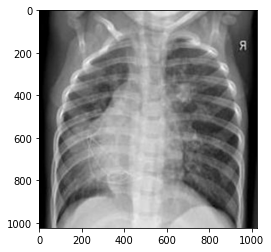

In [0]:
image = cv2.imread('Dataset All Augmented/Non-COVID-19/Non-COVID-19 (93).jpg')
plt.imshow(image)

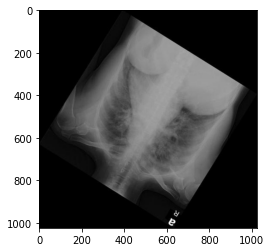

In [0]:
plt.imshow(cv2.imread('Dataset All Augmented/COVID-19/COVID-19 (59).jpg'))

###Count No of Images

---



Total No of data present in each folder 

COVID-19:912
Non-COVID-19:912


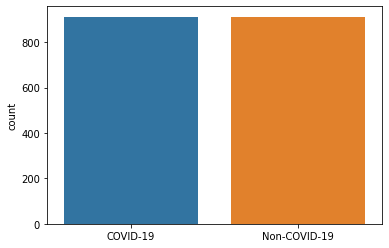

In [0]:

counts = []
dir = 'Dataset All Augmented'
print("Total No of data present in each folder \n")
for filename in os.listdir(dir):
        path = os.path.join(dir, filename)
        list1 = os.listdir(path) 
        number_files = len(list1)
        counts = counts + [filename]*number_files
        print (filename + ":"+ str(number_files))

sn.countplot(counts)

##Preprocessing Images

---



In [0]:
train_data_dir = 'Dataset All Augmented/'
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
    
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    subset='validation',
    shuffle = False) 

Found 1460 images belonging to 2 classes.
Found 364 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'COVID-19': 0, 'Non-COVID-19': 1}

##Build Model

---



In [0]:
cnv_model = MobileNet(input_shape=(224, 224, 3),include_top=False,weights='imagenet',pooling='avg',classes=2)
model=keras.models.Sequential()
model.add(cnv_model)
model.add(Dense(216,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

###Model Summary

---



In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1024)              3228864   
_________________________________________________________________
dense_4 (Dense)              (None, 216)               221400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                13888     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 3,464,217
Trainable params: 3,442,329
Non-trainable params: 21,888
_______________________________________

###Compile Model

---



In [0]:
model.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=0.0001, decay=0.0), metrics=['accuracy'])

###Early Stop and Create Log file

---



In [0]:
from keras.callbacks import CSVLogger,EarlyStopping
csv_logger = CSVLogger('COVID-19(MobileNet).csv', append=False, separator=';')
ES = EarlyStopping(monitor='val_accuracy', patience=3)

###Train Model 

---



In [0]:
history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch=46,epochs = 5,callbacks=[csv_logger , ES] ,  verbose = 1)

Epoch 1/5
46/46 [==============================] - 24s 527ms/step - loss: 0.1825 - accuracy: 0.9253 - val_loss: 0.0948 - val_accuracy: 0.9863
Epoch 2/5
46/46 [==============================] - 17s 364ms/step - loss: 0.0127 - accuracy: 0.9979 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 3/5
46/46 [==============================] - 17s 365ms/step - loss: 0.0083 - accuracy: 0.9979 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 4/5
46/46 [==============================] - 17s 364ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 8.7657e-04 - val_accuracy: 1.0000
Epoch 5/5
46/46 [==============================] - 17s 362ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000


###Plot Accuracy

---



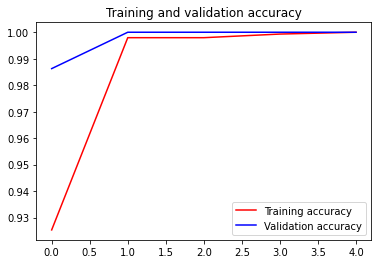

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

###Plot Loss

---



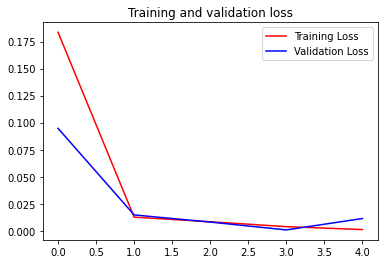

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

###Confusion Matrix and Confusion Report

---



In [0]:
validation_generator.reset()
Y_preds=model.predict_generator(validation_generator)


y_preds = [i[0] for i in Y_preds]
y_pred = []
for v in y_preds:
  if v <=0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

# y_pred = np.argmax(Y_preds, axis=1)
Matrix = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(Matrix)
print('Classification Report')
target_names = ['COVID-19', 'Normal']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[182   0]
 [  0 182]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       1.00      1.00      1.00       182
      Normal       1.00      1.00      1.00       182

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



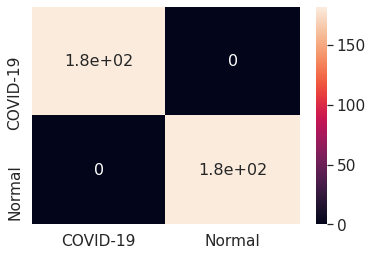

In [0]:
df_cm = pd.DataFrame(Matrix, target_names, target_names)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

###Testing Images

---



In [0]:
from keras.preprocessing import image
from google.colab import files
uploaded = files.upload()

test_images = []
filenames = list(map(lambda x: '/content/'+x,list(uploaded.keys())))

for fn in filenames: 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = x/255.0
  test_images.append(x)
test_images = np.array(test_images)
print(test_images.shape)
classes = model.predict(test_images)
for classe in classes:
  if classe<0.5:
    print(fn + " is a covid +")
  else:
    print(fn + " is a covid -")

###Save Model in drive

---



In [0]:
model.save("/content/drive/My Drive/saved_models/COVID_19.h5")

In [0]:
from google.colab import files
files.download('COVID-19(MobileNet).csv')

##Testing




---



---



###Load Model

---



In [0]:
from keras.models import load_model

In [0]:
Model = load_model("/content/drive/My Drive/saved_models/COVID_19.h5")

###model summary

---



In [0]:
Model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1024)              3228864   
_________________________________________________________________
dense_7 (Dense)              (None, 216)               221400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                13888     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 3,464,217
Trainable params: 3,442,329
Non-trainable params: 21,888
_______________________________________

###Ready to test images

---



Saving 0.jpeg to 0 (3).jpeg
Saving 1.jpeg to 1 (3).jpeg
Saving 2.jpeg to 2 (3).jpeg
Saving 3.jpeg to 3 (3).jpeg
Saving 4.jpeg to 4 (3).jpeg
Saving 5.jpeg to 5 (3).jpeg
Saving 6.jpeg to 6 (3).jpeg
Saving 7.jpeg to 7 (3).jpeg
Saving 8.jpeg to 8 (2).jpeg
Saving 9.jpeg to 9 (2).jpeg
Saving 10.jpeg to 10 (2).jpeg
Saving 11.jpeg to 11 (2).jpeg
Saving 12.jpeg to 12 (2).jpeg
Saving 13.jpeg to 13 (2).jpeg
Saving 14.jpeg to 14 (2).jpeg
Saving 15.jpeg to 15 (2).jpeg
Saving 16.jpeg to 16 (2).jpeg
Saving 17.jpeg to 17 (2).jpeg
Saving 18.jpeg to 18 (2).jpeg
Saving 19.jpeg to 19 (2).jpeg
Saving 20.jpeg to 20 (2).jpeg
Saving 21.jpeg to 21 (2).jpeg
Saving 22.jpeg to 22 (2).jpeg
Saving 23.jpeg to 23 (2).jpeg
Saving 24.jpeg to 24 (2).jpeg
Saving 25.jpeg to 25 (2).jpeg
Saving 26.jpeg to 26 (2).jpeg
Saving 27.jpeg to 27 (2).jpeg
Saving 28.jpeg to 28 (2).jpeg
Saving 29.jpeg to 29 (2).jpeg
[0.86848295]
0.jpeg is a covid -
[0.99791044]
1.jpeg is a covid -
[0.6241787]
2.jpeg is a covid -
[0.03198076]
3.jpeg is

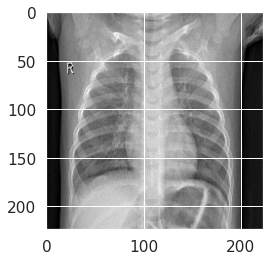

In [0]:
from keras.preprocessing import image
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  plt.imshow(img)
  x = image.img_to_array(img)
  
  x = np.expand_dims(x, axis=0)/255.0

  images = np.vstack([x])
  classes = Model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a covid +")
  else:
    print(fn + " is a covid -")